## Exploratory Data Analysis on World Happiness Project 2022

## Installing Python Libraries for EDA

In [72]:
#importing the necessary libraries for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('libraries imported')

libraries imported


## Importing our data

In [31]:
#importing our csv data
data= pd.read_csv('C:/Users/user/Downloads/2022.csv')

In [32]:
#checking the first five rows of our data
data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [33]:
#checking the columns in our data
data.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [34]:
#extracting the colums we will be using from our dataframe for analysis
data_columns= ['Country', 'Happiness score', 'Explained by: GDP per capita','Explained by: Social support', 
               'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity',
               'Explained by: Perceptions of corruption']
data_df= data[data_columns].copy()
data_df.head()

,Country,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,"7,821","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","1,945","1,206","0,787","0,651","0,271","0,419"


In [35]:
#rename our columns
data_df.rename({'Country': 'country_name', 'Happiness score': 'happiness_score', 
                'Explained by: GDP per capita': 'GDP_per_capita', 'Explained by: Social support': 'social_support', 
                'Explained by: Healthy life expectancy': 'healthy_life_expectancy', 
                'Explained by: Freedom to make life choices': 'freedom_to_make_life_choices', 
                'Explained by: Generosity': 'generosity', 'Explained by: Perceptions of corruption': 'perceptions_by_corruption'},
               axis= 'columns', inplace= True)

In [36]:
data_df.head()

,country_name,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_by_corruption
0,Finland,"7,821","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","1,945","1,206","0,787","0,651","0,271","0,419"


## Data Cleaning

In [37]:
#checking for null values
data_df.isnull().sum()

country_name                    0
happiness_score                 1
GDP_per_capita                  1
social_support                  1
healthy_life_expectancy         1
freedom_to_make_life_choices    1
generosity                      1
perceptions_by_corruption       1
dtype: int64

In [38]:
#we have only a row where all its values are missing so we decide to drop it
data_df.dropna(inplace=True)

In [39]:
#confirming if we still have a Nan values in our dataframe
data_df.isna().any()

country_name                    False
happiness_score                 False
GDP_per_capita                  False
social_support                  False
healthy_life_expectancy         False
freedom_to_make_life_choices    False
generosity                      False
perceptions_by_corruption       False
dtype: bool

In [40]:
#to see the number of rows and columns of our dataframe
data_df.shape

(146, 8)

In [41]:
#to see information about our dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   country_name                  146 non-null    object
 1   happiness_score               146 non-null    object
 2   GDP_per_capita                146 non-null    object
 3   social_support                146 non-null    object
 4   healthy_life_expectancy       146 non-null    object
 5   freedom_to_make_life_choices  146 non-null    object
 6   generosity                    146 non-null    object
 7   perceptions_by_corruption     146 non-null    object
dtypes: object(8)
memory usage: 10.3+ KB


In [42]:
#converting object typed data to float
#however because of a comma in the data, we can't convert it yet
#we have to remove the comma first, otherwise python will raise an error when we try to convert to float
data_df.replace(",", ".", regex=True, inplace=True)
data_df[['happiness_score', 'GDP_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices',
         'generosity', 'perceptions_by_corruption']]= data_df[['happiness_score', 'GDP_per_capita', 'social_support', 
                                                               'healthy_life_expectancy', 'freedom_to_make_life_choices', 
                                                               'generosity', 'perceptions_by_corruption']].astype(float)

In [73]:
#confirming to see if our column data types have been changed
data_df.dtypes

country_name                     object
happiness_score                 float64
GDP_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_by_corruption       float64
dtype: object

In [44]:
data_df.head()

,country_name,happiness_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_by_corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419


## Data Visualization

Text(0.5, 1.0, 'GDP Per Capita Box Plot')

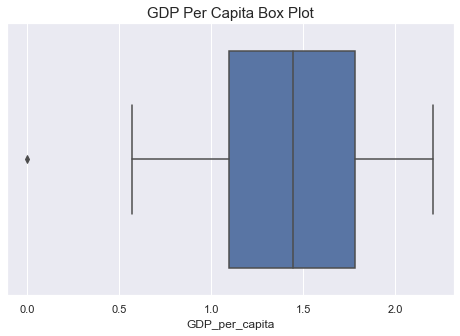

In [75]:
#plotting a box plot with our gdp per capita column
plt.figure(figsize=(8,5))
sns.boxplot(x='GDP_per_capita', data=data_df)
plt.title('GDP Per Capita Box Plot', fontsize=15)

#we can see we have an outlier here

<AxesSubplot:>

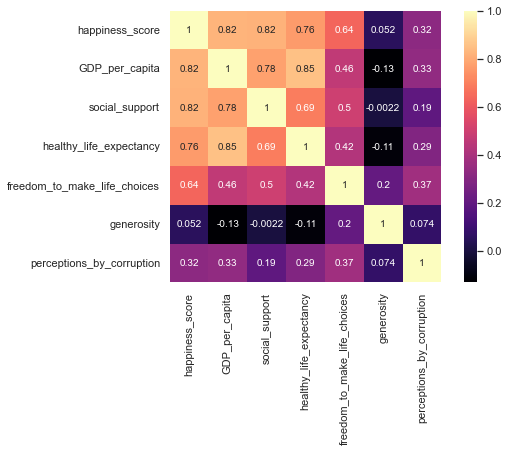

In [76]:
#plotting a correlation map
corr= data_df.corr(method='spearman')
f, ax=plt.subplots(figsize=(8,5))
sns.heatmap(corr, annot= True, mask= np.zeros_like(corr, dtype=bool)
           ,cmap='magma', square= True, ax=ax)

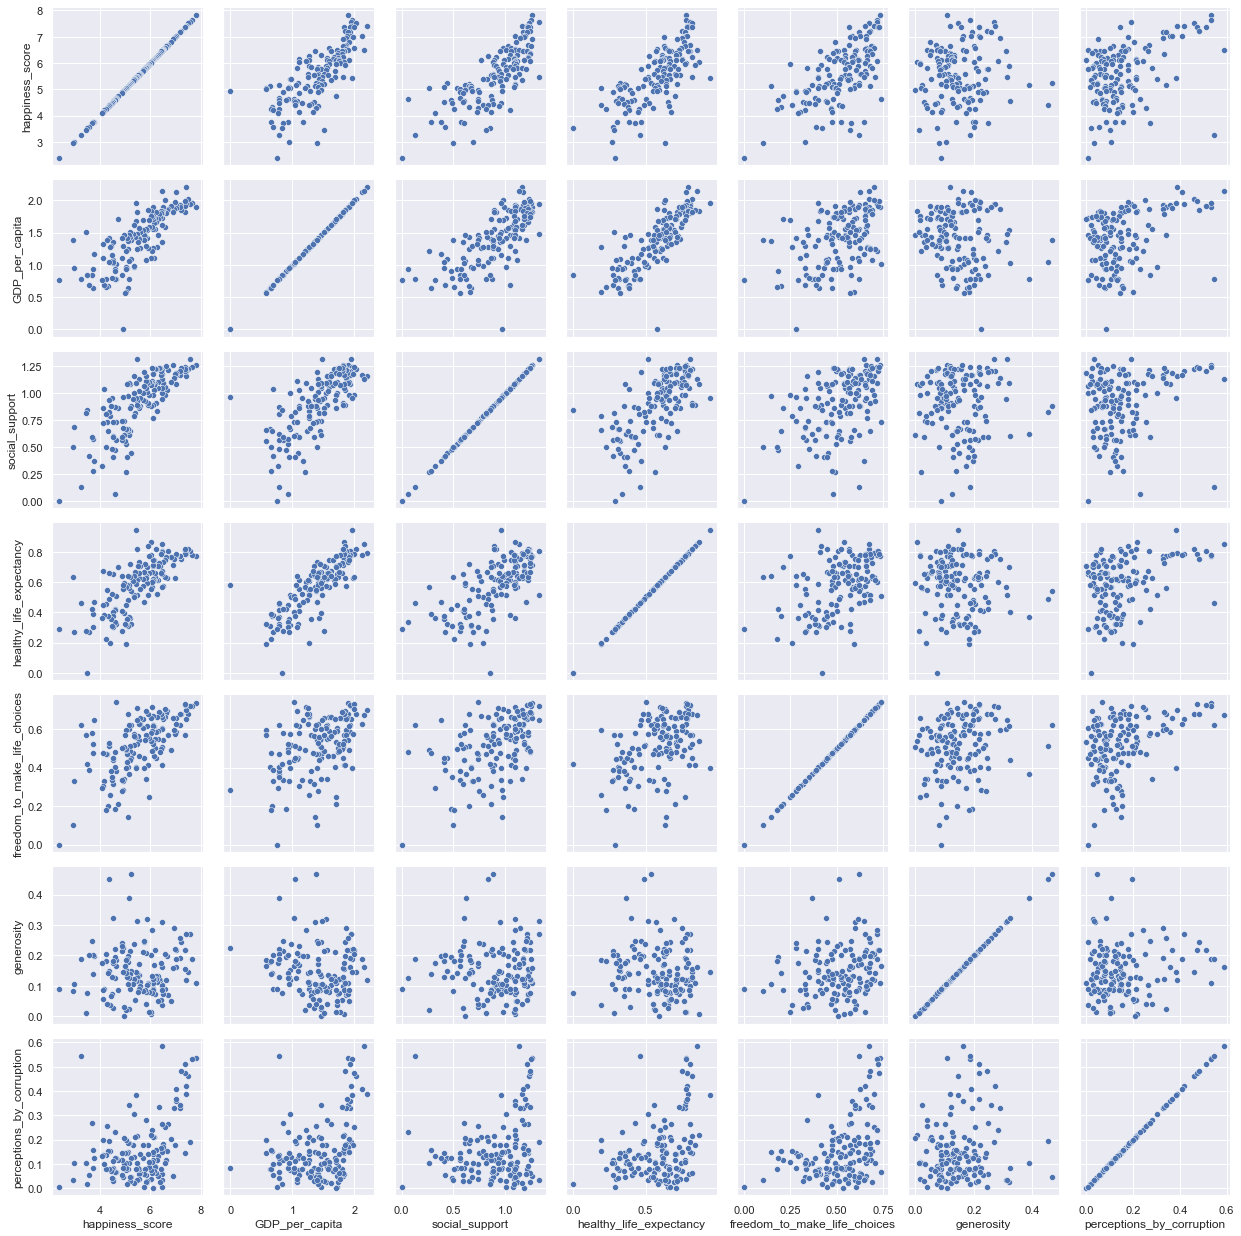

In [47]:
#plotting a pair grid to observe the relationships in our dataset
p= sns.PairGrid(data_df)
p.map(sns.scatterplot, edgecolor='white')

In [48]:
#top 10 happiest countries
top_10_happy= data_df.sort_values('happiness_score',ascending= False,ignore_index=True)[['country_name', 'happiness_score']].head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Finland'),
  Text(1, 0, 'Denmark'),
  Text(2, 0, 'Iceland'),
  Text(3, 0, 'Switzerland'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'Luxembourg*'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Israel'),
  Text(9, 0, 'New Zealand')])

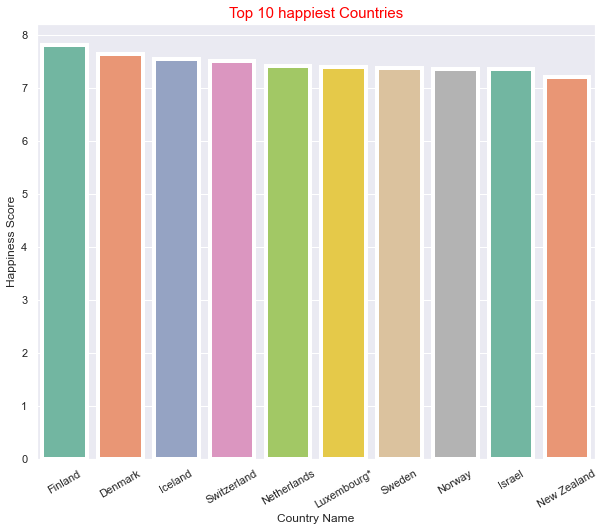

In [49]:
#bar chart of the 10 most happy country
plt.figure(figsize=(10,8))
sns.set_theme(style= 'darkgrid')
plt.title('Top 10 happiest Countries', fontsize= 15, color='red')
bar =sns.barplot(x= 'country_name', y= 'happiness_score', data= top_10_happy, palette='Set2', linewidth= 4.0, errwidth=5 )
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation =30)

In [50]:
#least 10 happiest countries
least_10_happy= data_df.sort_values('happiness_score',ascending= False,ignore_index=True)[['country_name', 'happiness_score']].tail(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Zambia'),
  Text(1, 0, 'Malawi'),
  Text(2, 0, 'Tanzania'),
  Text(3, 0, 'Sierra Leone'),
  Text(4, 0, 'Lesotho*'),
  Text(5, 0, 'Botswana*'),
  Text(6, 0, 'Rwanda*'),
  Text(7, 0, 'Zimbabwe'),
  Text(8, 0, 'Lebanon'),
  Text(9, 0, 'Afghanistan')])

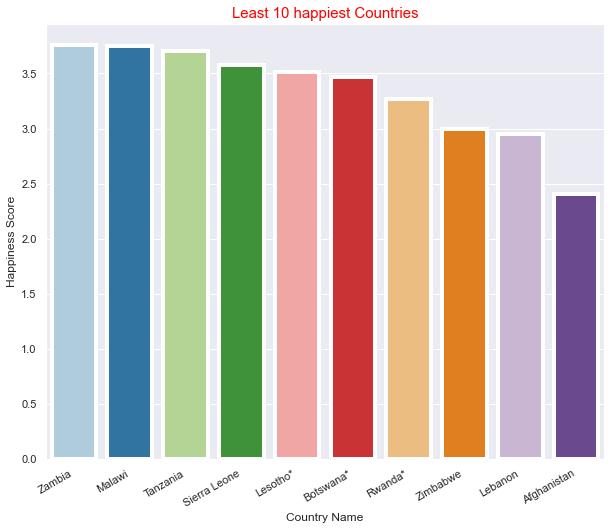

In [51]:
#bar chart of the 10 least happiest country
plt.figure(figsize=(10,8))
sns.set_theme(style= 'darkgrid')
plt.title('Least 10 happiest Countries', fontsize= 15, color='red')
bar= sns.barplot(x= 'country_name', y= 'happiness_score', data= least_10_happy, palette='Paired', linewidth= 4.0, errwidth=5 )
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Happiness Score', fontsize= 12)
plt.xticks(rotation =30, ha='right')

Text(0, 0.5, 'Happiness Score')

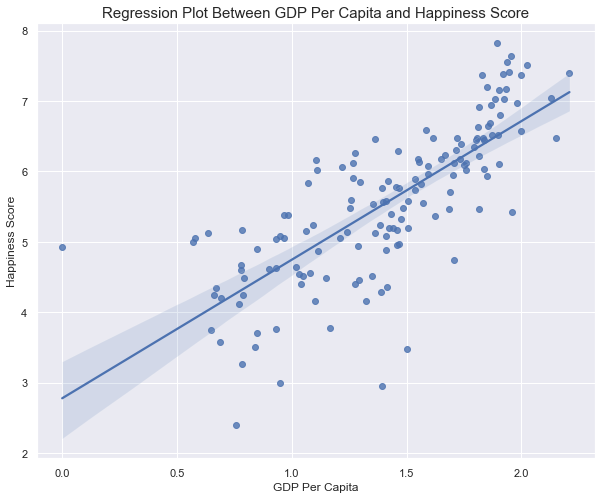

In [52]:
#plotting a reg plot between gdp per capia and happiness score
plt.figure(figsize=(10,8))
sns.set_theme(style= 'darkgrid')
sns.regplot(x= 'GDP_per_capita', y= 'happiness_score', data= data_df)
plt.title('Regression Plot Between GDP Per Capita and Happiness Score', fontsize= 15)
plt.xlabel('GDP Per Capita', fontsize= 12)
plt.ylabel('Happiness Score', fontsize=12)

Text(0, 0.5, 'Happiness Score')

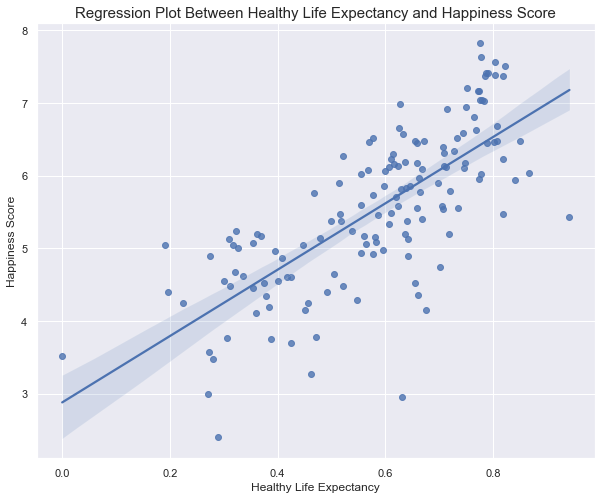

In [59]:
#plotting a reg plot between healthy life expectancy and happiness score
plt.figure(figsize=(10,8))
sns.set_theme(style= 'darkgrid')
sns.regplot(x= 'healthy_life_expectancy', y= 'happiness_score', data= data_df)
plt.title('Regression Plot Between Healthy Life Expectancy and Happiness Score', fontsize= 15)
plt.xlabel('Healthy Life Expectancy', fontsize= 12)
plt.ylabel('Happiness Score', fontsize=12)

Text(0.5, 1.0, 'Regression between Freedom to make life choices and Happiness Score')

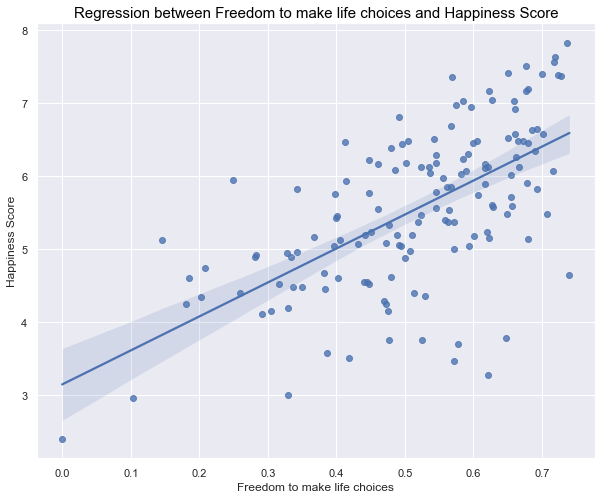

In [27]:
#plotting a reg plot between freedom to make life choices and happiness score
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.regplot(x='freedom_to_make_life_choices', y='happiness_score', data= data_df)
plt.xlabel('Freedom to make life choices', fontsize=12)
plt.ylabel('Happiness Score', fontsize= 12)
plt.title('Regression between Freedom to make life choices and Happiness Score', fontsize=15, color='black')